In [26]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import seaborn as sns


In [27]:
df = pd.read_csv("/Users/leonplaza/Downloads/mxmh_survey_results.csv")

"""


Music therapy, or MT, is the use of music to improve an individual's stress, mood, 
and overall mental health. MT is also recognized as an evidence-based practice, 
using music as a catalyst for "happy" hormones such as oxytocin.

However, MT employs a wide range of different genres, varying from one organization to the next.

The MxMH dataset aims to identify what, if any, correlations exist between an individual's music 
taste and their self-reported mental health. Ideally, these findings could contribute to a more 
informed application of MT or simply provide interesting sights about the mind.


Block 0: Background
Respondents answer generic questions focused on musical background and listening habits.

Block 1: Music genres
Respondents rank how often they listen to 16 music genres, where they can select:

Never
Rarely
Sometimes
Very frequently


Respondents rank Anxiety, Depression, Insomnia, and OCD on a scale of 0 to 10, where:
0 - I do not experience this.
10 - I experience this regularly, constantly/or to an extreme.

Data collection
Data collection was managed by @catherinerasgaitis via a Google Form. Respondents were not 
restricted by age or location.

The form was posted in various Reddit forums, Discord servers, and social media platforms. 
Posters and "business cards" were also used to advertise the form in libraries, parks, 
and other public locations.

The form was relatively brief so that respondents would be more likely finish the survey. 
"Harder" questions (such as BPM) were left optional for the same reason.


"""
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


## Cleaning

In [28]:
df = pd.read_csv("/Users/leonplaza/Downloads/mxmh_survey_results.csv")

def cleaning(df):
    df = df.drop(["Timestamp","Primary streaming service","BPM","Exploratory","Foreign languages", "Music effects","Permissions"], axis=1)  # Drop the BPM column, much NA's
    df = df.dropna(axis=0)
    return df

df = cleaning(df)

## Drop genres with less than 10 favorites
def drop_less_than_value(df):
    to_drop = []
    for i in range(len(df.groupby(by="Fav genre").count())):
        if df.groupby(by="Fav genre").count().iloc[i,0] < 10:
            to_drop.append(df.groupby(by="Fav genre").count().iloc[i,:].name)
        else:
            pass
    
    
    df = df[df["Fav genre"] != to_drop[0]]
    df = df[df["Fav genre"] != to_drop[1]]
    df = df.drop([f"Frequency [{to_drop[0]}]",f"Frequency [{to_drop[1]}]"], axis=1)
    df.reset_index(inplace=True, drop=True)# or df["Fav genre"] == to_drop[1]]
    return df



df = drop_less_than_value(df)
df.iloc[]

,Age,Hours per day,While working,Instrumentalist,Composer,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
0,63.0,1.5,Yes,No,No,Rock,Sometimes,Never,Never,Rarely,...,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0
1,18.0,4.0,No,No,No,Video game music,Never,Never,Very frequently,Never,...,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0
2,61.0,2.5,Yes,No,Yes,Jazz,Sometimes,Never,Never,Rarely,...,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0
3,18.0,4.0,Yes,No,No,R&B,Never,Never,Rarely,Never,...,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0
4,18.0,5.0,Yes,Yes,Yes,Jazz,Rarely,Sometimes,Never,Never,...,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,17.0,2.0,Yes,Yes,No,Rock,Very frequently,Rarely,Never,Sometimes,...,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0
716,18.0,1.0,Yes,Yes,No,Pop,Rarely,Rarely,Never,Never,...,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0
717,19.0,6.0,Yes,No,Yes,Rap,Rarely,Sometimes,Sometimes,Rarely,...,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0
718,19.0,5.0,Yes,Yes,No,Classical,Very frequently,Never,Never,Never,...,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0


In [29]:
# Yes/No to 1 and 0

def boolean(x):
    if x == "Yes":
        return float(1)
    elif x == "No":
        return float(0)

def to_boolean(df):
    for i in df.columns:
        if set(df[i]) == {"Yes","No"}:
            df[i] = df[i].apply(boolean)
        else:
            pass
    return df

df = to_boolean(df)
df

,Age,Hours per day,While working,Instrumentalist,Composer,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
0,63.0,1.5,1.0,0.0,0.0,Rock,Sometimes,Never,Never,Rarely,...,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0
1,18.0,4.0,0.0,0.0,0.0,Video game music,Never,Never,Very frequently,Never,...,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0
2,61.0,2.5,1.0,0.0,1.0,Jazz,Sometimes,Never,Never,Rarely,...,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0
3,18.0,4.0,1.0,0.0,0.0,R&B,Never,Never,Rarely,Never,...,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0
4,18.0,5.0,1.0,1.0,1.0,Jazz,Rarely,Sometimes,Never,Never,...,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,17.0,2.0,1.0,1.0,0.0,Rock,Very frequently,Rarely,Never,Sometimes,...,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0
716,18.0,1.0,1.0,1.0,0.0,Pop,Rarely,Rarely,Never,Never,...,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0
717,19.0,6.0,1.0,0.0,1.0,Rap,Rarely,Sometimes,Sometimes,Rarely,...,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0
718,19.0,5.0,1.0,1.0,0.0,Classical,Very frequently,Never,Never,Never,...,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0


## Generation Table - Web Scraping


In [30]:
url = "https://www.careerplanner.com/career-articles/generations.cfm"
def gen_scraping(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.content, 'html.parser')
    gen = soup.find_all("tr")

    gen_list_of_lists = []
    for x in gen:
        gencol = x.getText().replace("\r\n"," ").replace("\t"," ").strip()
        gencol = gencol.split("\n")
        gen_list_of_lists.append([i for i in gencol if i != ""])

    gen_df = pd.DataFrame(gen_list_of_lists, columns=gen_list_of_lists[0])
    gen_df = gen_df.drop(0, axis=0)
    gen_df = gen_df.set_index("Generation Name")
    gen_df = gen_df.astype(int, errors="ignore")
    gen_df = gen_df.reset_index()
    
    
    
    return gen_df

In [31]:
gen_df = gen_scraping(url)

def change_gennames(df):
    try:
        df.iloc[0,0] = "The Lost Generation"
        df.iloc[-3,0] =  "Millennials"
        df.iloc[4,0] = "Baby Boomers"
        df.iloc[5,0] = "Generation X"
        df.iloc[-2,0] = "Gen Z"
        return df
    except:
        pass

gen_df = change_gennames(gen_df)
gen_df

,Generation Name,Births Start,Births End,Youngest Age Today*,Oldest Age Today*
0,The Lost Generation,1890,1915,108,133
1,The Interbellum Generation,1901,1913,110,122
2,The Greatest Generation,1910,1924,99,113
3,The Silent Generation,1925,1945,78,98
4,Baby Boomers,1946,1964,59,77
5,Generation X,1965,1979,44,58
6,Xennials,1975,1985,38,48
7,Millennials,1980,1994,29,43
8,Gen Z,1995,2012,11,28
9,Gen Alpha,2013,2025,1,10


In [32]:
def generation(x,df=gen_df):
    for i in range(len(df)):
        if x >= int(df.loc[i,"Youngest Age Today*"]):
            return df.loc[i,"Generation Name"]
        else: 
            pass

df["Generation"] = df["Age"].apply(generation)
df

,Age,Hours per day,While working,Instrumentalist,Composer,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Generation
0,63.0,1.5,1.0,0.0,0.0,Rock,Sometimes,Never,Never,Rarely,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Baby Boomers
1,18.0,4.0,0.0,0.0,0.0,Video game music,Never,Never,Very frequently,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,Gen Z
2,61.0,2.5,1.0,0.0,1.0,Jazz,Sometimes,Never,Never,Rarely,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Baby Boomers
3,18.0,4.0,1.0,0.0,0.0,R&B,Never,Never,Rarely,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Gen Z
4,18.0,5.0,1.0,1.0,1.0,Jazz,Rarely,Sometimes,Never,Never,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Gen Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,17.0,2.0,1.0,1.0,0.0,Rock,Very frequently,Rarely,Never,Sometimes,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Gen Z
716,18.0,1.0,1.0,1.0,0.0,Pop,Rarely,Rarely,Never,Never,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Gen Z
717,19.0,6.0,1.0,0.0,1.0,Rap,Rarely,Sometimes,Sometimes,Rarely,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Gen Z
718,19.0,5.0,1.0,1.0,0.0,Classical,Very frequently,Never,Never,Never,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Gen Z


## Groupby generation

In [33]:
def grouped_table(x, df=df):
    dicts = {}
    keys = df.columns

    for i in keys:
        dicts[i] = "mean"
    for i in df.columns:
        if df[i].dtypes != float:
            dicts.pop(i)
        
    count = df.groupby(x).aggregate({df.columns[0]:"count"})
    count = count.rename(columns={df.columns[0]:"Count"})
    count
            
    df_group = df.groupby(x).aggregate(dicts)
    df_grouped = pd.concat([df_group, count], axis=1)
    
    return df_grouped

# Mental Health indicators by Generation

In [34]:
generation_df = grouped_table("Generation")
def present_dataframe(df,sort="Age"):
    try:
        df = df.sort_values(by=sort, ascending=False)
    except:
        pass
    df = df.round(2)
    return df
    
present_dataframe(generation_df)

,Age,Hours per day,While working,Instrumentalist,Composer,Anxiety,Depression,Insomnia,OCD,Count
Generation,,,,,,,,,,
The Silent Generation,84.50,13.50,1.00,1.00,0.50,3.50,1.50,4.50,1.00,2
Baby Boomers,64.57,2.87,0.78,0.13,0.17,4.17,3.04,2.61,1.22,23
Generation X,52.07,3.59,0.69,0.14,0.14,3.31,3.03,3.59,1.66,29
Xennials,40.52,2.57,0.72,0.20,0.08,5.16,4.52,4.36,2.48,25
Millennials,32.30,2.98,0.70,0.30,0.14,6.33,5.18,4.46,2.93,87
Gen Z,19.89,3.68,0.81,0.34,0.18,6.00,4.97,3.61,2.74,553
Gen Alpha,10.00,2.00,1.00,1.00,0.00,8.00,2.00,1.00,1.00,1


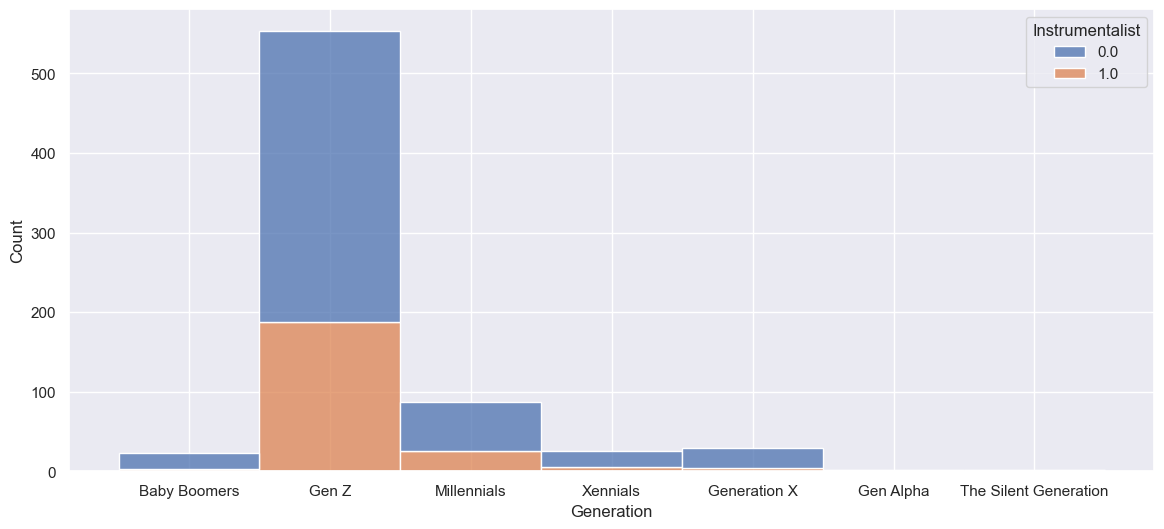

In [35]:
def stacked_histplot(df,X,HUE):
    sns.set(rc={'figure.figsize':(14,6)})
    sns.histplot(data=df, x=X, hue=HUE, multiple="stack");
    
    
stacked_histplot(df, "Generation", "Instrumentalist")

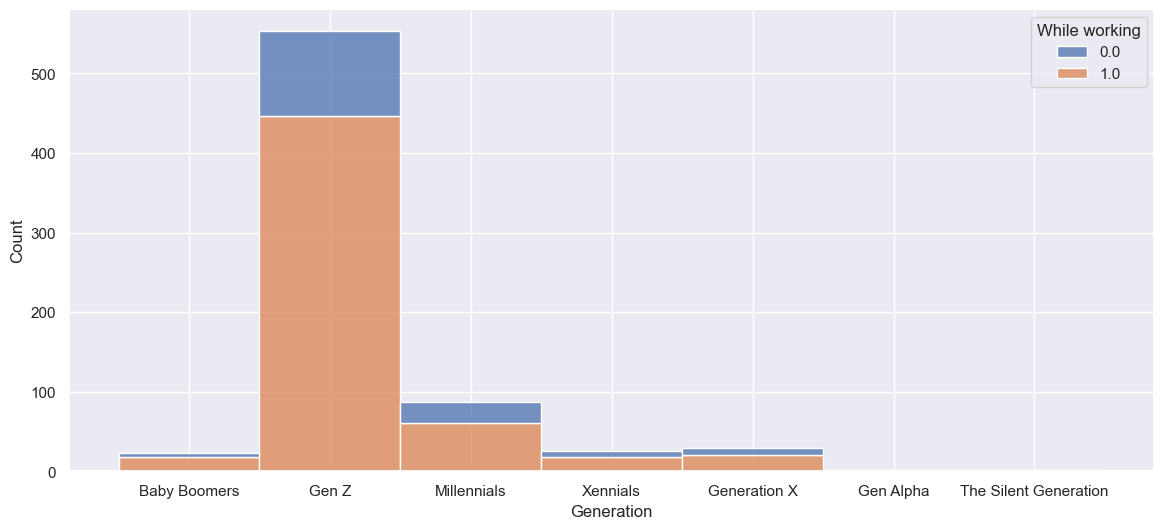

In [36]:
stacked_histplot(df, "Generation", "While working")

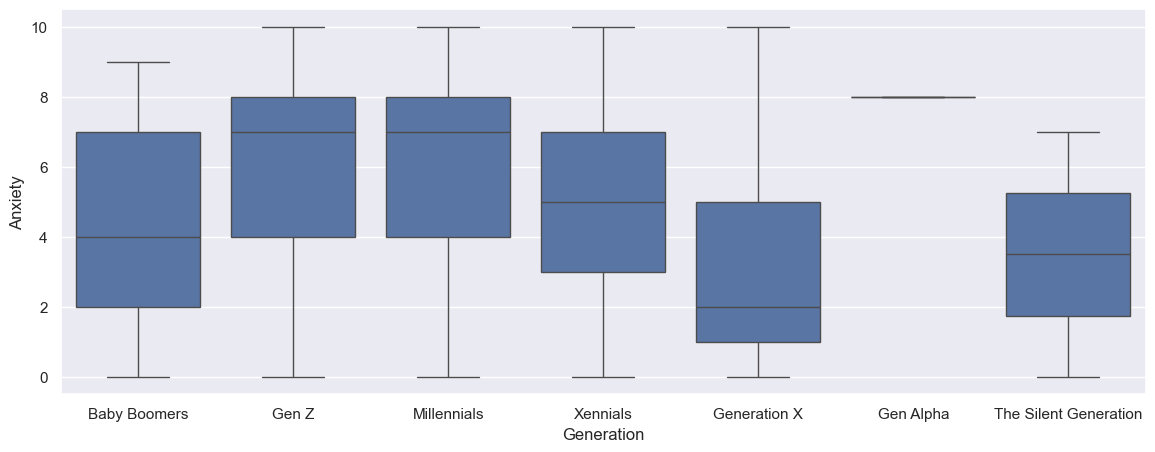

In [37]:
def boxplot(df,X,HUE):
    sns.set(rc={'figure.figsize':(14,5)})
    sns.boxplot(data=df, x=X, y=HUE);
    
boxplot(df,"Generation","Anxiety")

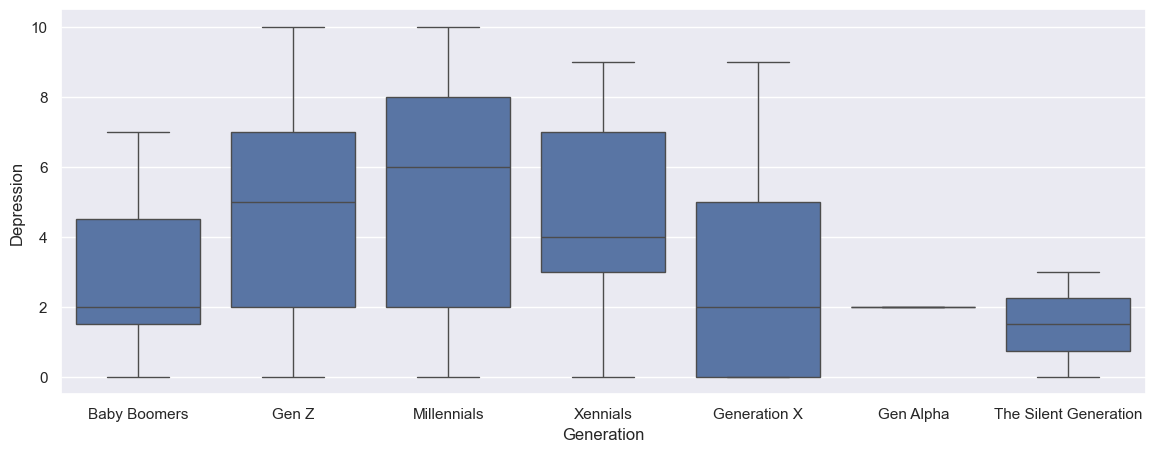

In [50]:
boxplot(df,"Generation","Depression")

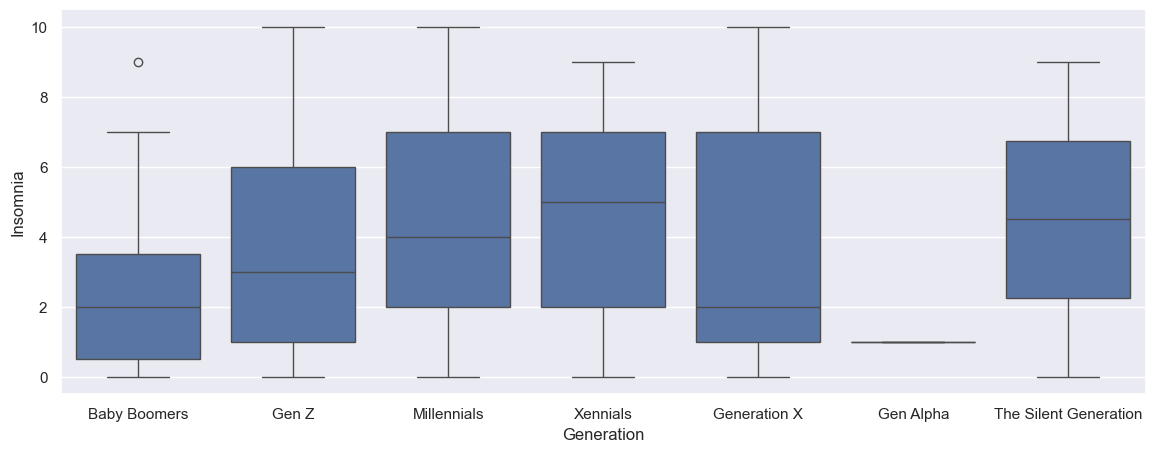

In [39]:
boxplot(df,"Generation","Insomnia")

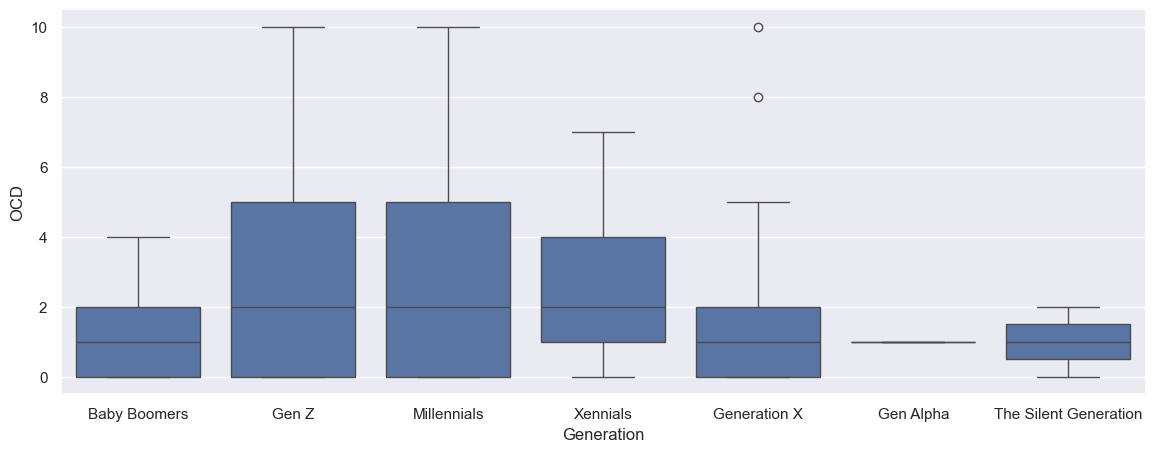

In [40]:
boxplot(df,"Generation","OCD")

# What are the genre with most mental health score?

In [53]:
genre_df = grouped_table("Fav genre")
genre_df = present_dataframe(genre_df)

# Mayor puntaje
def top(x, df,col=None):
    top_number = x
    
    if col == None:
        top_anx = pd.DataFrame(df["Anxiety"].sort_values(ascending=False).head(top_number)).reset_index()
        top_dep = pd.DataFrame(df["Depression"].sort_values(ascending=False).head(top_number)).reset_index()
        top_ins = pd.DataFrame(df["Insomnia"].sort_values(ascending=False).head(top_number)).reset_index()
        top_ocd = pd.DataFrame(df["OCD"].sort_values(ascending=False).head(top_number)).reset_index()
        top = pd.concat([top_anx,top_dep,top_ins,top_ocd], axis=1)
    else:
        top = pd.DataFrame(df[col].sort_values(ascending=False).head(top_number)).reset_index()
        

    top = top.rename({"Fav genre":"Genre"}, axis=1)
    top["Ranking"] = range(1,len(top)+1)
    top.set_index("Ranking", inplace=True)

    return top

# Menor puntaje
def bottom(x, df,col=None):
    top_number = x
    
    if col == None:
        top_anx = pd.DataFrame(df["Anxiety"].sort_values(ascending=True).head(top_number)).reset_index()
        top_dep = pd.DataFrame(df["Depression"].sort_values(ascending=True).head(top_number)).reset_index()
        top_ins = pd.DataFrame(df["Insomnia"].sort_values(ascending=True).head(top_number)).reset_index()
        top_ocd = pd.DataFrame(df["OCD"].sort_values(ascending=True).head(top_number)).reset_index()
        top = pd.concat([top_anx,top_dep,top_ins,top_ocd], axis=1)
    else:
        top = pd.DataFrame(df[col].sort_values(ascending=True).head(top_number)).reset_index()
    
    top = top.rename({"Fav genre":"Genre"}, axis=1)
    top["Ranking"] = range(1,len(top)+1)
    top.set_index("Ranking", inplace=True)

    return top


top(5,genre_df)


,Genre,Anxiety,Genre,Depression,Genre,Insomnia,Genre,OCD
Ranking,,,,,,,,
1,Folk,6.57,Lofi,6.60,Lofi,5.60,Lofi,3.40
2,K pop,6.30,Hip hop,5.88,Metal,4.56,Rap,3.18
3,Hip hop,6.12,Rock,5.26,Video game music,4.02,EDM,3.00
4,Rock,6.11,EDM,5.24,EDM,3.97,Pop,2.86
5,Lofi,6.10,Folk,5.07,Rock,3.85,Jazz,2.80


In [55]:
bottom(5,genre_df)

,Genre,Anxiety,Genre,Depression,Genre,Insomnia,Genre,OCD
Ranking,,,,,,,,
1,Classical,4.83,R&B,3.83,Rap,2.27,Folk,2.20
2,Rap,5.09,Rap,4.00,Country,2.72,K pop,2.26
3,R&B,5.17,Classical,4.02,R&B,2.89,Classical,2.38
4,Country,5.40,K pop,4.04,K pop,3.17,Metal,2.40
5,EDM,5.49,Country,4.32,Pop,3.37,Video game music,2.42


## Are Instrumentalists more common in certain Genre?

In [49]:
def clean_for_binary(df):
    clean_df = df.drop(df.iloc[:,6:20].columns, axis=1)
    try:
        clean_df = clean_df.drop("Generation", axis=1)
    except:
        pass
    return clean_df

clean_df = clean_for_binary(df)
clean_df

,Age,Hours per day,While working,Instrumentalist,Composer,Fav genre,Anxiety,Depression,Insomnia,OCD
0,63.0,1.5,1.0,0.0,0.0,Rock,7.0,2.0,2.0,1.0
1,18.0,4.0,0.0,0.0,0.0,Video game music,7.0,7.0,10.0,2.0
2,61.0,2.5,1.0,0.0,1.0,Jazz,9.0,7.0,3.0,3.0
3,18.0,4.0,1.0,0.0,0.0,R&B,7.0,2.0,5.0,9.0
4,18.0,5.0,1.0,1.0,1.0,Jazz,8.0,8.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...
715,17.0,2.0,1.0,1.0,0.0,Rock,7.0,6.0,0.0,9.0
716,18.0,1.0,1.0,1.0,0.0,Pop,3.0,2.0,2.0,5.0
717,19.0,6.0,1.0,0.0,1.0,Rap,2.0,2.0,2.0,2.0
718,19.0,5.0,1.0,1.0,0.0,Classical,2.0,3.0,2.0,1.0


In [44]:
def group_binary(df, group, col):
    bin_df = pd.DataFrame(df.groupby(by=group).mean()[col]).round(2)
    return bin_df.sort_values(by=col, ascending=False)

group_binary(clean_df, "Fav genre", "Instrumentalist")

,Instrumentalist
Fav genre,
Classical,0.73
Jazz,0.55
Video game music,0.37
Metal,0.36
K pop,0.35
Rock,0.29
Country,0.28
Folk,0.27
Rap,0.27


## Are Composer more common in certain Genre?

In [45]:
comp_by_gen = pd.DataFrame(clean_df.groupby(by="Fav genre").mean()["Composer"]).round(2)
comp_by_gen.sort_values(by="Composer", ascending=False)

group_binary(clean_df, "Fav genre", "Composer")

,Composer
Fav genre,
Jazz,0.45
Classical,0.25
Metal,0.23
Video game music,0.21
Lofi,0.20
EDM,0.19
Hip hop,0.18
Rap,0.18
Country,0.16


## What genre has the most loyal listeners?

In [56]:
freq_df = df.iloc[:,5:-5]

def freq_convertion(x):
    scale = {'Never':0, 'Rarely':1, 'Sometimes':2, 'Very frequently':3}
    return float(scale[x])


def apply_freq_convertion(df):
    for i in range(1,len(df.columns)):
        df.iloc[:,i] = df.iloc[:,i].apply(lambda x:freq_convertion(x))
    return df

freq_df = apply_freq_convertion(freq_df)
freq_df

,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music]
0,Rock,2.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,0.0,2.0,2.0,1.0,3.0,1.0
1,Video game music,0.0,0.0,3.0,0.0,1.0,1.0,3.0,2.0,2.0,1.0,0.0,1.0,1.0,3.0
2,Jazz,2.0,0.0,0.0,1.0,0.0,3.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0
3,R&B,0.0,0.0,1.0,0.0,3.0,0.0,3.0,2.0,0.0,2.0,3.0,3.0,0.0,1.0
4,Jazz,1.0,2.0,0.0,0.0,2.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Rock,3.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,1.0,3.0,0.0
716,Pop,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,2.0,2.0
717,Rap,1.0,2.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0
718,Classical,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [47]:
def ponderation_freq(df, groupby):
    sum_freq = [sum(df.iloc[i,1:]) for i in range(len(df))]
    percentage = df.copy()
    
    for i in range(len(df)):  # rows
        for j in range(1, len(df.columns)):  # cols
            percentage.iloc[i,j] = df.iloc[i,j] / sum_freq[i]
            
    percentage_by_genre = percentage.groupby(by="Fav genre").aggregate("mean")    
    percentage_loyal = [percentage_by_genre.iloc[i,i] for i in range(len(percentage_by_genre))]
    
    loyal_df = pd.DataFrame(percentage_loyal, index=percentage_by_genre.index)
    loyal_df = loyal_df.rename({0:f"How often {groupby} is listened compared to the rest"},axis=1)
    loyal_df = loyal_df.round(3).sort_values(f"How often {groupby} is listened compared to the rest", ascending=False)
    return loyal_df

ponderation_freq(freq_df, "Fav genre")

,How often Fav genre is listened compared to the rest
Fav genre,
Country,0.267
Classical,0.263
Metal,0.202
Rock,0.186
EDM,0.184
Video game music,0.184
K pop,0.182
Pop,0.176
Folk,0.174
